### Automation of Instagram Interactions & Content Creation using OpenCV, PyAutoGUI and Large Language Models (e.g. ChatGPT) - Part 1
Welcome to this Jupyter Notebook focused on automating Instagram content creation. In this notebook, we will explore a use case scenario where we leverage the power of OpenCV, PyAutoGUI, and the OpenAI library to automate key tasks on Instagram. By using these libraries, we can automatically like and follow other user accounts, as well as generate automated comments. Please note that this was only tested in Google Chrome and with a resolution of 2540 x 1440 and 1920 x 1080. Theoretically it should also work with other resolutions, but not other webbrowsers.

The example described here, using PyAutoGUI, OpenCV and OpenAI provides flexibility and ease of implementation, but it is not optimized for speed or efficiency. Automating interactions in this manner involves simulating user clicks on icons and navigating through the Instagram webpage, which can introduce some inherent limitations and potential performance trade-offs.

In addition, this example utilizes the OpenCV image recognition library to identify logos, icons and buttons on the screen to navigate on the website to decide where to click. The ./resources/ folder in this repository consists a collection of such logos, icons and buttons. However, adding additional templates for matching is as easy as taking a small screenshot (Windows: Shift + Windows Key + S) and copying the .png file into the ./resources/ folder.


In [2]:
# Importing necessary libraries and helper functions from utils.py
from time import sleep
import random
from waiting import wait
from utils2 import *
import matplotlib.pyplot as plt

Image you have opened the instagram website for the hashtag #goldenretrievers and you want to automatically like some of the posts.

![alt text](./documents/image_2.png "Instagram")

First, we take a snapshot of the screen. We store the snapshot in our temporary folder. The region indicates the area from where we want to take a screenshot (x1, y1, x2, y2). Here we take a screenshot of our full screen. Verbose can be set to false to suppress the output statement.

In [7]:
# First we should take a screenshot.
path_to_image = './tmp/snapshot.png'
snapshot = take_screenshot(file_name=path_to_image, region=(0, 0, 2560, 1440), verbose=True)

[2023-09-12 - 11:43:42] Created Screenshot: ./tmp/snapshot.png.


Next, let´s open the instagram home page. For that, we could either change the URL (www.instagram.com) or click on the home button on the side. Let´s click on the home button.

The white_home.png contains an image of the small house.

(-0.5, 57.5, 54.5, -0.5)

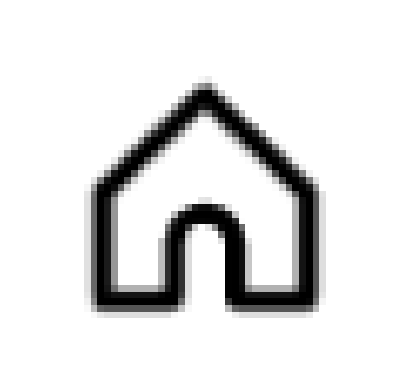

In [8]:
# Let us quickly visualize the home icons.
path_to_template = './resources/white_home.png'
template = cv2.imread(path_to_template)

# Convert the BGR image to RGB
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(template_rgb)
plt.axis('off')

We can use that house to search and click on the website. For that, we use the locate_image function. We simply pass the path to our saved screenshot and the path to the template image. If it works, we should receive an x and y position.

In [9]:
# We locate the x and y position of the home button in our saved screenshot.
x, y = locate_image(path_to_image, path_to_template)
print(x,y)

54 307


Next, let´s move our cursor to the home button and click on it. For that, we use a simple wrapper around the PyAutoGUI function that controls the mouse cursor. By setting do_click to True, we immediately click on the target position. The delay variable adds a random delay (minimum_time_in_s, maximum_time_in_s) to the click.

In [14]:
move_cursor(x, y, do_click=True, delay=(0.3, 0.5))

If this work, you should now be on your homepage. Since we have switched pages, we need to update our snapshot.

In [15]:
snapshot = take_screenshot(file_name=path_to_image, region=(0, 0, 2560, 1440), verbose=True)

[2023-09-12 - 11:44:12] Created Screenshot: ./tmp/snapshot.png.


 In a similar fashion, you can navigate through nearly all elements on the instagram webpage. Image you want to follow a person that is suggested to you. Usually, this panel occurs on the right side of your instagram homepage. Let´s search for the blue follow button that occurs on the "suggested for you" part of the website.

![alt text](./documents/image_4.png "Instagram")

We use the "blue_follow_button" as template to locate on our snapshot. Then, we move the cursor on click on the coordinates again.

In [17]:
path_to_template = './resources/blue_follow_button.png'
x, y = locate_image(path_to_image, path_to_template)
move_cursor(x, y, do_click=True, delay=(0.3, 0.5))

Since there are multiple buttons, let´s use a loop to go through this until all follow buttons are clicked.

In [18]:
for ii in range(0,4):
    snapshot = take_screenshot(file_name=path_to_image, region=(0, 0, 2560, 1440), verbose=True)
    path_to_template = './resources/blue_follow_button.png'
    x, y = locate_image(path_to_image, path_to_template)
    move_cursor(x, y, do_click=True, delay=(0.3, 0.5))

[2023-09-12 - 11:44:31] Created Screenshot: ./tmp/snapshot.png.
[2023-09-12 - 11:44:32] Created Screenshot: ./tmp/snapshot.png.
[2023-09-12 - 11:44:33] Created Screenshot: ./tmp/snapshot.png.
[2023-09-12 - 11:44:34] Created Screenshot: ./tmp/snapshot.png.


Done - we just followed five people automatically. However, we can do even more complex steps of actions on the website.

In the next piece, we will create a list of commands that will be executed in sequence automatically.
1) We will open the instagram page of #goldenretriever
2) We move our cursor to the first post on position (1) and open the post
3) We take another screenshot to update the content on the screen
4) We like the post
5) We follow the user from the post

In [19]:
# Defining the actions
action_sequence = [goto_hashtag_page('goldenretriever'), # Visit Golden Retriever Hashtag Page
                       move_to_image_position(3), # Move and click on the post on position 1
                       take_screenshot(file_name=path_to_image, region=(0, 0, 2560, 1440), verbose=True), # Update Screenshot
                       like_post(), # Like the Post
                       follow_user_from_post(), # Follow the User From the Post
                       ]

# We iterate over all actions in our sequence
for fn in action_sequence:
    fn

[2023-09-12 - 11:44:49] Created Screenshot: ./tmp/snapshot.png.


Maybe we also want to leave a nice comment below the post. Let´s do this next.

In [20]:
# We take a screenshot to have the lastest screen information
take_screenshot(file_name=path_to_image, region=(0, 0, 2560, 1440), verbose=True), # Update Screenshot

# Search comment field and click on it
initiate_comment()

# Write text into comment field and submit the post.
write_and_post_comment('What a great dog! I love him!')

[2023-09-12 - 11:44:58] Created Screenshot: ./tmp/snapshot.png.


So let´s put all of this into a one action sequence.

In [21]:
# Defining the actions
action_sequence = [goto_hashtag_page('puppy'),
                       move_to_image_position(3),
                       take_screenshot(file_name=path_to_image, region=(0, 0, 2560, 1440), verbose=True),
                       like_post(),
                       follow_user_from_post(),
                       initiate_comment(),
                       write_and_post_comment('What a great dog! I love him!')
                       ]

# We iterate over all actions in our sequence
for fn in action_sequence:
    fn

[2023-09-12 - 11:45:16] Created Screenshot: ./tmp/snapshot.png.


Obviously, posting always the same post might become boring very quickly (and Instagram might recognize that you are spamming). So let´s rely on ChatGPT (or some other LLM) to create some more interesting posts.

In [14]:
comment = query_gpt_for_commment()

[2023-09-07 - 20:50:00] [Created Comment]: Awwww 😍 This pup is absolutely adorable! Such a sweet face and those eyes just melt my heart! 💕


The function calls the ChatGPT API and utilizes the following prompt to generate responses that are appropriate for a social media network such as instagram:

"""
You are a social media expert with 10 years experience on instagram.
You are primarily engaging with content related about cute animals, such as dogs and puppies. 
You are commenting on posts from followers and other instagram users, primarily with the purpose of engaging with them and making them follow your account.
You are always kind and nice and respectful.
Make sure that youre response is between two to three sentences long and feel free to use emojis.
Make also sure that you do not include quotation marks at the beginning or the end of the prompt.
Last, do not ask explicitly for people to follow you.

Your task is write to a comment to an instagram post that shows a cute dog.
"""

The text shows some variation, but are overall not very original. This reflects on one side the strictness of the prompt which doesn´t leave much room for imagination. On the other hand, this also reflects the reality of often very shallow and simple posts in the instagram dog and puppies community.


So let´s repeat the sequence with a custom-generated comment. For that, we simply replace the text in write_and_post_comment() with a call to our query_gpt_for_commment() function.


In [23]:
# Defining the actions
action_sequence = [goto_hashtag_page('puppy'),
                       move_to_image_position(5),
                       take_screenshot(file_name=path_to_image, region=(0, 0, 2560, 1440), verbose=True),
                       like_post(),
                       follow_user_from_post(),
                       initiate_comment(),
                       write_and_post_comment(query_gpt_for_commment())
                       ]

# We iterate over all actions in our sequence
for fn in action_sequence:
    fn

[2023-09-12 - 11:46:24] Created Screenshot: ./tmp/snapshot.png.
[2023-09-12 - 11:46:28] [Created Comment]: Aww, what an adorable pupper! 😍 Their cuteness is off the charts! 😊


In the following 